# **11. Connected Component Analysis**


Connected Component Analysis (CCA) is a fundamental technique in image processing, used to detect and analyze distinct regions of an image. Essentially, it helps us identify "objects" in a binary image and gather statistics about them. These objects are typically clusters of connected pixels that share the same properties (like intensity).

The process usually involves three steps:
* **Labeling objects**: Each connected region is assigned a unique label.
* **Counting objects**: Once labeled, it’s easy to count how many distinct objects exist.
* **Extracting region statistics**: We can compute metrics like area, perimeter, bounding box, or aspect ratio for each object. These statistics are useful in applications like counting fruits, analyzing patterns, or detecting shapes.

## **11.1. Counting Objects**

We'll use scikit-image for labeling and region properties.

Number of fruits detected (after filtering tiny regions): 5

Fruit 1: Area=83464.0, Perimeter=3179.8, Aspect Ratio=1.75
Fruit 2: Area=17124.0, Perimeter=1507.0, Aspect Ratio=1.68
Fruit 3: Area=648.0, Perimeter=192.5, Aspect Ratio=1.95
Fruit 4: Area=1732.0, Perimeter=618.2, Aspect Ratio=2.65
Fruit 5: Area=1759.0, Perimeter=229.6, Aspect Ratio=1.75


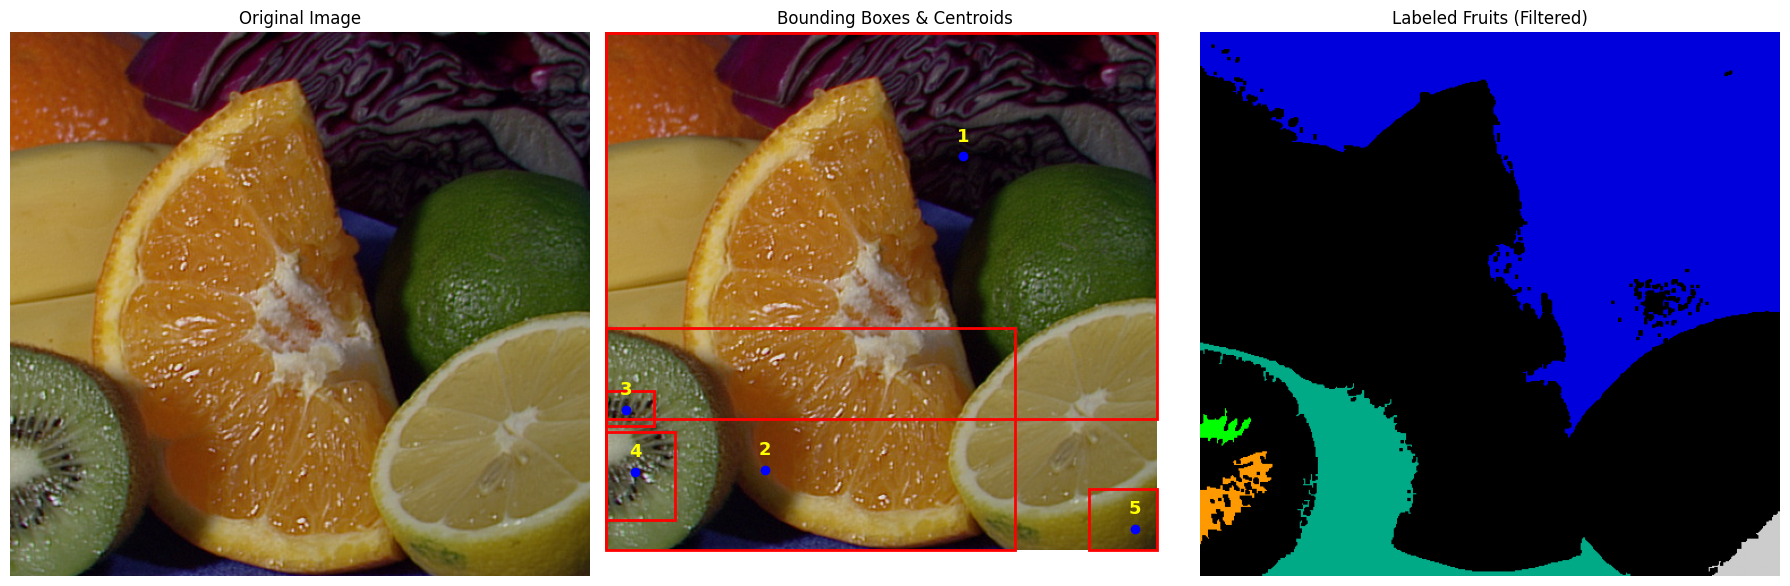

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.morphology import closing, footprint_rectangle
import numpy as np
from matplotlib.patches import Rectangle

# --- Step 1: Load image and grayscale ---
image = io.imread('fruits.jpg')
gray = color.rgb2gray(image)

# --- Step 2: Threshold to create binary image ---
thresh = threshold_otsu(gray)
binary = gray < thresh  # fruits appear darker than background

# --- Step 3: Clean up small holes ---
binary = closing(binary, footprint_rectangle((3, 3)))

# --- Step 4: Label connected components ---
labeled_image = label(binary)
props = regionprops(labeled_image)

# --- Step 5: Filter out tiny regions ---
min_area = 500
filtered_props = [p for p in props if p.area >= min_area]

# --- Step 6: Print stats in console ---
print(f"Number of fruits detected (after filtering tiny regions): {len(filtered_props)}\n")
for i, prop in enumerate(filtered_props, 1):
    aspect_ratio = float('inf') if prop.minor_axis_length == 0 else prop.major_axis_length / prop.minor_axis_length
    print(f"Fruit {i}: Area={prop.area}, Perimeter={prop.perimeter:.1f}, Aspect Ratio={aspect_ratio:.2f}")

# --- Step 7: Create clean labeled image ---
filtered_label = np.zeros_like(labeled_image)
for i, prop in enumerate(filtered_props, 1):
    filtered_label[labeled_image == prop.label] = i

# --- Step 8: 1 row × 3 columns plotting ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Column 1: Original Image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Column 2: Bounding Boxes + Centroids + Numbers (with offset)
axes[1].imshow(image)
axes[1].set_title('Bounding Boxes & Centroids')
axes[1].axis('off')

for i, prop in enumerate(filtered_props, 1):
    # Bounding box
    minr, minc, maxr, maxc = prop.bbox
    rect = Rectangle((minc, minr), maxc - minc, maxr - minr,
                     edgecolor='red', facecolor='none', linewidth=2)
    axes[1].add_patch(rect)

    # Centroid
    cy, cx = prop.centroid
    axes[1].plot(cx, cy, 'bo')

    # Fruit number slightly above the centroid to avoid collision
    axes[1].text(cx, cy - 10, str(i), color='yellow', fontsize=13, weight='bold',
                 ha='center', va='bottom')

# Column 3: Labeled Fruits
axes[2].imshow(filtered_label, cmap='nipy_spectral')
axes[2].set_title('Labeled Fruits (Filtered)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# **11.2. Detecting Objects in a Chessboard Pattern**

Connected Component Analysis is not limited to natural objects. Patterns like a chessboard can be analyzed similarly. Suppose we want to label the black squares:

Original shape: (1240, 1754, 4)
Total components detected: 27
Filtered black squares detected: 27
Square 1: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 2: Area=43218.0, Perimeter=1168.0, Aspect Ratio=2.65
Square 3: Area=43218.0, Perimeter=1168.0, Aspect Ratio=2.65
Square 4: Area=43218.0, Perimeter=1168.0, Aspect Ratio=2.65
Square 5: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 6: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 7: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 8: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 9: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 10: Area=64974.0, Perimeter=1754.0, Aspect Ratio=1.57
Square 11: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 12: Area=21609.0, Perimeter=584.0, Aspect Ratio=1.00
Square 13: Area=21754.0, Perimeter=584.8, Aspect Ratio=1.01
Square 14: Area=21756.0, Perimeter=586.0, Aspect Ratio=1.01
Square 15: Area=21754.0, Perimeter=584.8, Aspect Ratio=1.01
Square 

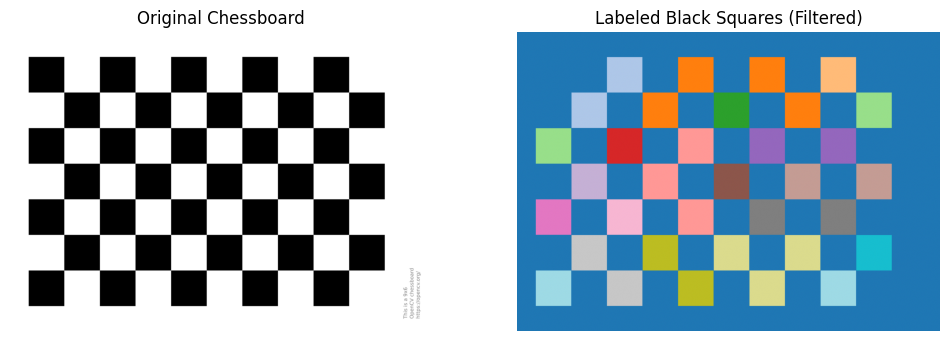

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label, regionprops
import numpy as np

# --- Step 1: Load image and drop alpha channel ---
image = io.imread('chessboard.png')
print("Original shape:", image.shape)

# Drop alpha if present
if image.shape[2] == 4:
    rgb_image = image[:, :, :3]
else:
    rgb_image = image

# --- Step 2: Threshold black squares using RGB values ---
# Treat a pixel as black if all channels are below 50 (0-255)
binary = np.all(rgb_image < 50, axis=2)

# --- Step 3: Label connected components ---
labeled_image = label(binary)
props = regionprops(labeled_image)
print("Total components detected:", len(props))

# --- Step 4: Filter tiny noise (optional) ---
filtered_props = [p for p in props if p.area >= 20]  # minimal area filter
filtered_label = np.zeros_like(labeled_image)
for i, p in enumerate(filtered_props, 1):
    filtered_label[labeled_image == p.label] = i

print("Filtered black squares detected:", len(filtered_props))

# --- Step 5: Print stats ---
for i, p in enumerate(filtered_props, 1):
    aspect_ratio = float('inf') if p.minor_axis_length == 0 else p.major_axis_length / p.minor_axis_length
    print(f"Square {i}: Area={p.area}, Perimeter={p.perimeter:.1f}, Aspect Ratio={aspect_ratio:.2f}")

# --- Step 6: Plot original vs labeled ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.title('Original Chessboard')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_label, cmap='tab20')
plt.title('Labeled Black Squares (Filtered)')
plt.axis('off')
plt.show()